In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_theme(style="whitegrid")

# Parameter
algo = 'dots' # Can be 'dots', 'dp'

# Load Data for Points Plot (algo_points.csv)
points_file = f'{algo}_points.csv'
df_points = pd.read_csv(points_file)
# Normalize columns if needed (dots_points.csv seems to have standard names)
# Remove rows with any -1 values (failed runs)
df_points = df_points[~(df_points == -1).any(axis=1)]

# Load Data for Dist Plot (algo_frechet.csv)
frechet_file = f'{algo}_frechet.csv'
df_frechet = pd.read_csv(frechet_file)
# Rename columns for frechet file
df_frechet = df_frechet.rename(columns={'best_points': 'simp_points', 'best_simp_dist': 'simp_dist'})
# Remove rows with any -1 values (failed runs)
df_frechet = df_frechet[~(df_frechet == -1).any(axis=1)]

print(f"Loaded {points_file} and {frechet_file}")
display(df_points.head())
display(df_frechet.head())

# Basic Summary
print("Points Dataset Summary:")
display(df_points.describe())
print("Frechet Dataset Summary:")
display(df_frechet.describe())

Loaded dp_points.csv and dp_frechet.csv


,id,delta,epsilon,baseline_dist,simp_dist,orig_points,baseline_points,simp_points
1,7,156.190519,0.5,234.285779,220.891586,454,169,162
2,6,127.490045,0.5,191.235067,180.369565,792,67,64
3,5,368.964715,0.5,553.447072,521.799323,798,184,102
6,2,226.953858,0.5,340.430786,321.558644,1674,595,392
7,9,379.761757,0.5,569.642635,537.068026,643,190,92


,id,best_delta,epsilon,baseline_dist,simp_dist,orig_points,baseline_points,simp_points,note
1,7,156.190519,0.5,234.285779,220.891586,454,169,162,NaN
4,6,127.490045,0.5,191.235067,180.369565,792,67,64,NaN
5,13,158.431556,0.5,237.647333,224.268041,368,185,174,NaN
7,11,140.391085,0.5,210.586628,198.547948,703,247,234,NaN
8,12,122.870077,0.5,184.305115,165.414592,814,3,4,exceed_baseline_points


Points Dataset Summary:


,id,delta,epsilon,baseline_dist,simp_dist,orig_points,baseline_points,simp_points
count,77.000000,77.000000,77.0,77.000000,77.000000,77.000000,77.000000,77.000000
mean,79.259740,204.104573,0.5,306.156859,288.589091,1050.961039,215.701299,167.428571
std,42.972575,144.304623,0.0,216.456934,204.136835,549.847597,145.794743,122.840871
min,2.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.000000,2.000000
25%,37.000000,134.643703,0.5,201.965555,190.419449,661.000000,122.000000,90.000000
50%,86.000000,163.357035,0.5,245.035552,231.020000,987.000000,189.000000,144.000000
75%,114.000000,246.507964,0.5,369.761946,348.619845,1417.000000,312.000000,240.000000
max,144.000000,1237.466442,0.5,1856.199662,1750.040000,2643.000000,595.000000,508.000000


Frechet Dataset Summary:


,id,best_delta,epsilon,baseline_dist,simp_dist,orig_points,baseline_points,simp_points
count,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000
mean,78.407895,142.276040,0.5,307.267425,201.171937,1058.263158,217.013158,202.210526
std,42.598647,45.297971,0.0,217.674263,64.100336,549.729955,146.305297,136.498920
min,2.000000,0.000013,0.5,0.000020,0.000027,2.000000,2.000000,2.000000
25%,36.750000,129.854826,0.5,201.526493,183.690992,661.750000,131.000000,117.500000
50%,85.500000,137.817805,0.5,245.783369,194.908474,992.500000,189.500000,182.000000
75%,112.500000,153.319966,0.5,372.964808,216.831851,1435.500000,313.000000,285.500000
max,140.000000,375.183708,0.5,1856.199662,530.594255,2643.000000,595.000000,540.000000


/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/1755623620.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
/var/folders/f3/h4301l8d7hn_1612_5g5hpmw0000gn/T/ipykernel_90337/1755623620.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)


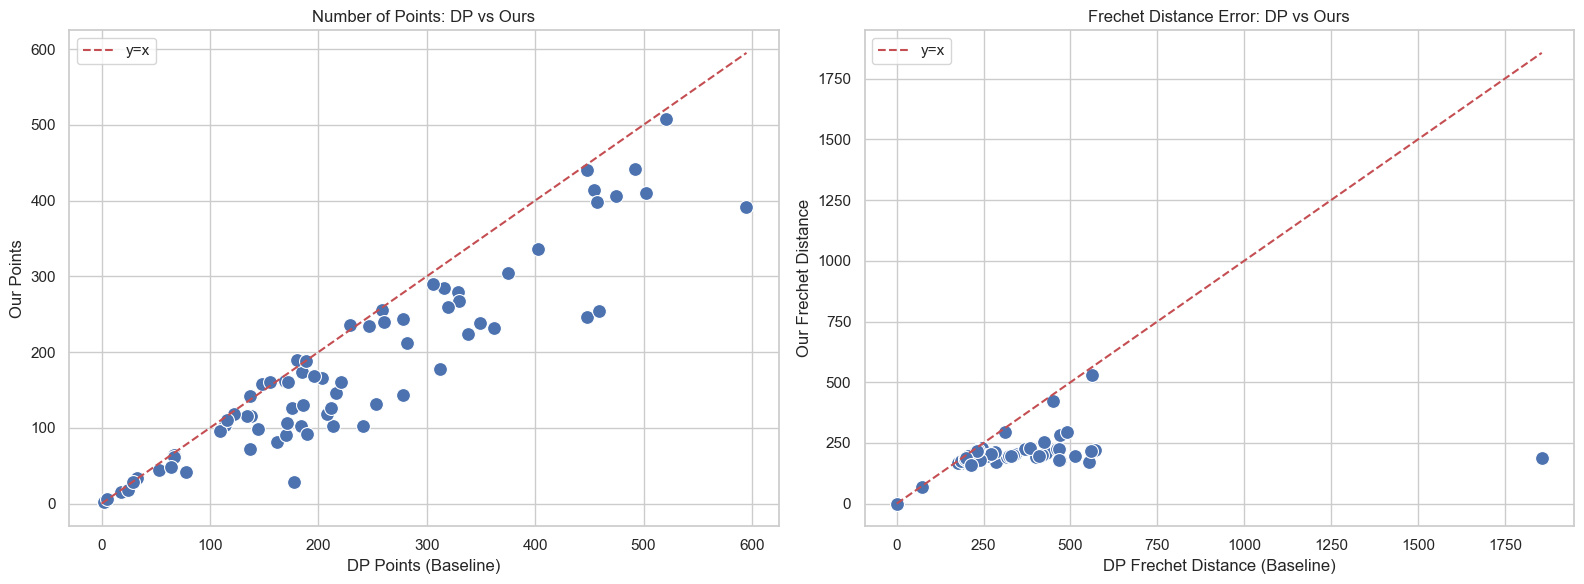

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Points Comparison (using df_points)
sns.scatterplot(data=df_points, x='baseline_points', y='simp_points', palette='viridis', ax=axes[0], s=100)
max_val = max(df_points['baseline_points'].max(), df_points['simp_points'].max())
axes[0].plot([0, max_val], [0, max_val], 'r--', label='y=x')
axes[0].set_title(f'Number of Points: {algo.upper()} vs Ours')
axes[0].set_xlabel(f'{algo.upper()} Points (Baseline)')
axes[0].set_ylabel('Our Points')
axes[0].legend()

# Plot 2: Error Comparison (using df_frechet)
sns.scatterplot(data=df_frechet, x='baseline_dist', y='simp_dist', palette='viridis', ax=axes[1], s=100)
# Use max from the specific dataframe
max_dist = max(df_frechet['baseline_dist'].max(), df_frechet['simp_dist'].max())
axes[1].plot([0, max_dist], [0, max_dist], 'r--', label='y=x')
axes[1].set_title(f'Frechet Distance Error: {algo.upper()} vs Ours')
axes[1].set_xlabel(f'{algo.upper()} Frechet Distance (Baseline)')
axes[1].set_ylabel('Our Frechet Distance')
axes[1].legend()

plt.tight_layout()
plt.show()